# How to generate a normal distribution from a uniform random variable using Metropolis-Hastings

In [57]:
import numpy as np
import scipy as sci
from scipy.stats import uniform
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

# Normal distribution from a uniform distribution using MH

In [77]:

target_mu = 0
target_sd = 1
burnin = 5000
def mh_normal(mu,sd,nsim=10000,proposal_scale=1):
    chain = np.zeros(nsim)
    num_accept = 0.0
    #note that the first value is 0
    
    #uniform distribution is strange for scipy
    #This distribution is constant between loc and loc + scale.
    #http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html
    #goal is [-proposed_scale/2,proposed_scale/2]
    lb = -proposal_scale/2.0
    ub = proposal_scale
    for i in range(1,nsim):
        x_t = chain[i-1]
        #center proposal at previous value
        proposal_t = x_t + uniform.rvs(loc=lb,scale=ub,size=1)[0]
        ratio = np.exp( norm.logpdf(x=proposal_t,loc=mu,scale=sd) - norm.logpdf(x=x_t,loc=mu,scale=sd))
        prob_accept = np.minimum(1.0,ratio)
        #prob_accept = np.exp( (x_t ** 2 - proposal_t ** 2) / 2.0 )
        rand = uniform.rvs(size=1)[0]
        if rand <= prob_accept:
            chain[i] = proposal_t
            num_accept += 1
        else:
            chain[i] = x_t
    return { "markov_chain": chain, "acceptace_rate": num_accept / float(nsim)}


# Uniform [-10,10] around the current value of x

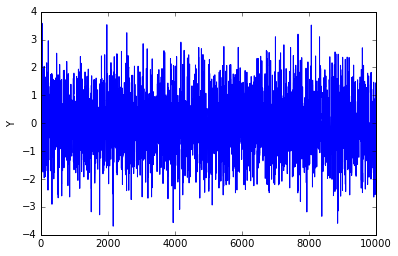

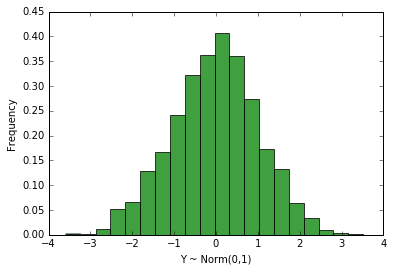

Accept-rate: 0.3151
Mean: -0.0265659952192
Sd: 1.02950814859


In [78]:

mh_res = mh_normal(mu = target_mu, sd = target_sd, proposal_scale =10)

chain = mh_res["markov_chain"]

pruned = chain[burnin:]

#chain
plt.plot(chain)
plt.ylabel('Y')
plt.show()


# plot distribution
n, bins, patches = plt.hist(pruned, 20, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Y ~ Norm(0,1)')
plt.ylabel('Frequency')
plt.show()

print "Accept-rate: " + str(mh_res["acceptace_rate"])
print "Mean: " + str(np.mean(pruned))
print "Sd: " + str(np.std(pruned))

# Uniform [-5,5] around the current value of x

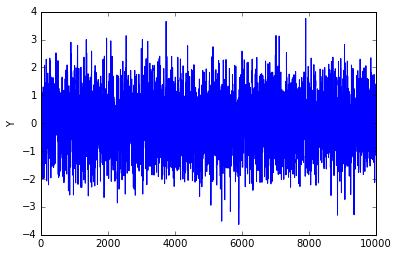

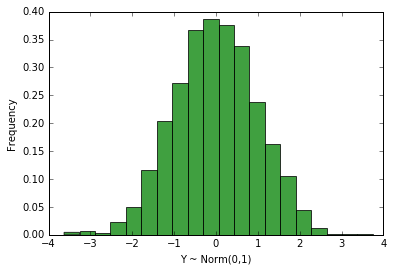

Accept-rate: 0.5613
Mean: -0.0073960588827
Sd: 0.984795174361


In [73]:
mh_res = mh_normal(mu = target_mu, sd = target_sd, proposal_scale =5)

chain = mh_res["markov_chain"]

pruned = chain[burnin:]

#chain
plt.plot(chain)
plt.ylabel('Y')
plt.show()


# plot distribution
n, bins, patches = plt.hist(pruned, 20, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Y ~ Norm(0,1)')
plt.ylabel('Frequency')
plt.show()

print "Accept-rate: " + str(mh_res["acceptace_rate"])
print "Mean: " + str(np.mean(pruned))
print "Sd: " + str(np.std(pruned))

# Uniform [-1,1] around the current value of x

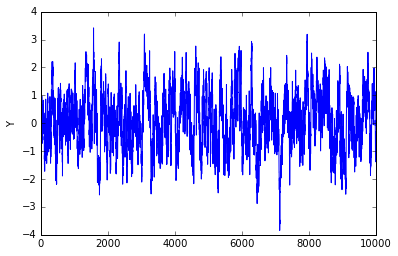

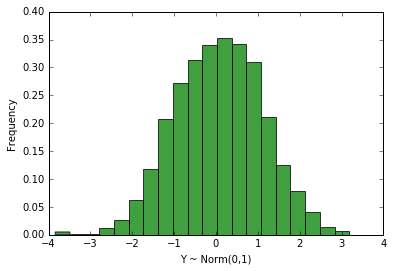

Accept-rate: 0.8952
Mean: 0.0689437476928
Sd: 1.04215305752


In [74]:
mh_res = mh_normal(mu = target_mu, sd = target_sd, proposal_scale =1)

chain = mh_res["markov_chain"]

pruned = chain[burnin:]

#chain
plt.plot(chain)
plt.ylabel('Y')
plt.show()


# plot distribution
n, bins, patches = plt.hist(pruned, 20, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Y ~ Norm(0,1)')
plt.ylabel('Frequency')
plt.show()

print "Accept-rate: " + str(mh_res["acceptace_rate"])
print "Mean: " + str(np.mean(pruned))
print "Sd: " + str(np.std(pruned))

# Uniform [-0.5,0.5] around the current value of x

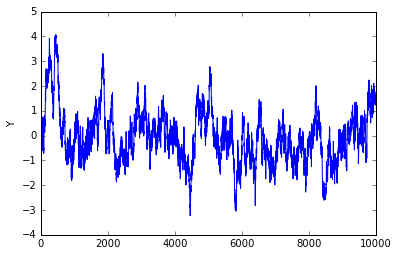

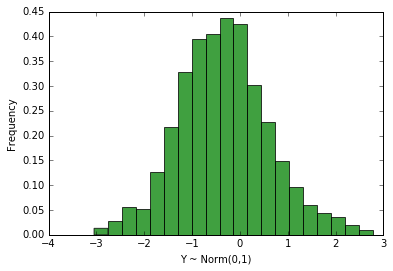

Accept-rate: 0.9534
Mean: -0.342202471777
Sd: 0.95080636001


In [75]:
mh_res = mh_normal(mu = target_mu, sd = target_sd, proposal_scale =0.5)

chain = mh_res["markov_chain"]

pruned = chain[burnin:]

#chain
plt.plot(chain)
plt.ylabel('Y')
plt.show()


# plot distribution
n, bins, patches = plt.hist(pruned, 20, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Y ~ Norm(0,1)')
plt.ylabel('Frequency')
plt.show()

print "Accept-rate: " + str(mh_res["acceptace_rate"])
print "Mean: " + str(np.mean(pruned))
print "Sd: " + str(np.std(pruned))

# Uniform [-0.1,0.1] around the current value of x

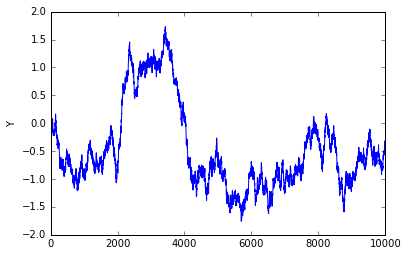

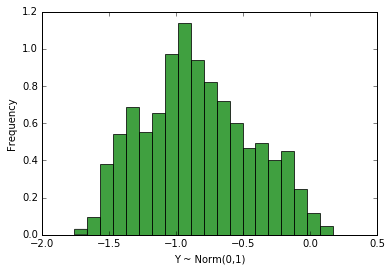

Accept-rate: 0.9899
Mean: -0.843268265428
Sd: 0.399961744597


In [76]:
mh_res = mh_normal(mu = target_mu, sd = target_sd, proposal_scale =0.1)

chain = mh_res["markov_chain"]

pruned = chain[burnin:]

#chain
plt.plot(chain)
plt.ylabel('Y')
plt.show()


# plot distribution
n, bins, patches = plt.hist(pruned, 20, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Y ~ Norm(0,1)')
plt.ylabel('Frequency')
plt.show()

print "Accept-rate: " + str(mh_res["acceptace_rate"])
print "Mean: " + str(np.mean(pruned))
print "Sd: " + str(np.std(pruned))

# Punchline
* It is very important to get the scale right for the proposal distribution
* Going too wide is better than too narrow
* Acceptance rate around 20-30% is good even in this simple case